# **Importing required modules**

In [ ]:
import math          #It provides access to the mathematical functions defined by the C standard.
import random        #implements pseudo-random number generators for various distributions.
import matplotlib.pyplot as plt  #a comprehensive library for creating static, animated, and interactive visualizations.

**Objective Functions To Be Optimized**

In [ ]:
def function1(x):           #the first function to be optimized.
    value = -x**3
    return value

def function2(x):           #the second function to be optimized.
    value = -(x-2)**2
    return value

**Function to find index of list**

In [ ]:
def index_of(a,list):                   
    for i in range(0,len(list)):
        if list[i] == a:
            return i            #returns the index position of an item in a list or a character or range of characters in a string.
    return -1                   #Index from the end of the list using a negative number, where [-1] returns the last element.

**Function to sort by values**

In [ ]:
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))     #insert an item in a sorted list maintaining the order.
        values[index_of(min(values),values)] = math.inf          #math.inf return a float value, representing the value of positive infinity.
    return sorted_list                                           #Built-in function that builds a new sorted list from an iterable.

**Function to carry out NSGA-II's fast non dominated sort**

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]          #The set of all feasible solutions is called the feasible region, or S.
    front = [[]]                                        
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]          #to rank the underlying data of the given list.

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:                 
                    S[p].append(q)               #The return value is a new list, leaving the old list unchanged.
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1                 #evalute the if condition and if it evaluates to False. 
                                                #then it will evalute the elif blocks and execute the elif block whose expression evaluates to True.
        if n[p]==0:                             #If multiple elif conditions become True, then the first elif block will be executed.
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)              #The condition is like a filter that only accepts the items that valuate to True.

    i = 0
    while(front[i] != []):                      #Only accept items that are not [] the sorted list
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]                       #using del to delete all the elements in range starting from index mentioned in arguments.
    return front

**Function to calculate crowding distance**

In [ ]:
def crowding_distance(values1, values2, front):    #The crowding distance value of a particular solution is the average distance of its two neighboring solutions. 
    distance = [0 for i in range(0,len(front))] 
    sorted1 = sort_by_values(front, values1[:])    #The boundary solutions which have the lowest and highest objective function values are given an infinite crowding distance values.
    sorted2 = sort_by_values(front, values2[:])    #so that they are always selected.    
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance                              #The selection operators of fitness and diversity are used to improve the performance of the algorithm.

**Function to carry out the crossover**

In [ ]:
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)       #two-parent chromosome are selected and a random/given point is selected.
    else:                              #and the genes/data are interchanged between them after the given/selected point for example.
        return mutation((a-b)/2)

**Function to carry out the mutation operator**

In [ ]:
def mutation(solution):              #Mutating methods are ones that change the object after the method has been used.
    mutation_prob = random.random()  #The word mutator means that the list is changed by the method.
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution                 #Return the best solution.


**Main program starts here**

In [ ]:
pop_size = 20       #number of population
max_gen = 921       #maximum of generation 

**Initialization**

In [ ]:
min_x=-55
max_x=55
solution=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(solution[i])for i in range(0,pop_size)]
    function2_values = [function2(solution[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print("The best front for Generation number ",gen_no, " is")   
    for valuez in non_dominated_sorted_solution[0]:
        print(round(solution[valuez],3),end=" ")
    print("\n")                    #The default value of the end parameter of the built-in print function is \n , so a new line character is appended to the string.
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    #Generating offsprings          
    while(len(solution2)!=2*pop_size):         #Create offspring population from this new population using crowded tournament selection 
        a1 = random.randint(0,pop_size-1)      #It compares by front ranking, if equal then by crowding distance, crossover and mutation operators.
        b1 = random.randint(0,pop_size-1)
        solution2.append(crossover(solution[a1],solution[b1]))
    function1_values2 = [function1(solution2[i])for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i])for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):             #Perform a non-dominated sorting in the combination of parent and offspring populations and classify them by fronts.
            break                                       #they are sorted according to an ascending level of non-domination
    solution = [solution2[i] for i in new_solution]         #The convergence to an optimal solution depends on the chosen initial solution.
    gen_no = gen_no + 1                                     

The best front for Generation number  0  is
-19.53 -23.718 -20.001 -5.71 6.203 -7.314 -51.721 -36.427 -26.276 -7.146 -40.805 

The best front for Generation number  1  is
-40.163 -19.53 -23.718 -20.001 -5.71 -7.314 -51.721 -36.427 -26.276 -7.146 -40.805 -52.502 0.767 -19.643 -14.128 -15.723 -32.166 -15.555 -0.057 

The best front for Generation number  2  is
-48.412 -40.163 -19.53 -23.718 -20.001 -5.71 -7.314 -51.721 -36.427 -26.276 -7.146 -40.805 -52.502 0.767 -19.643 -14.128 -15.723 -32.166 -15.555 -0.057 

The best front for Generation number  3  is
-30.184 -48.412 -40.163 -19.53 -23.718 -20.001 -5.71 -7.314 -51.721 -36.427 -26.276 -7.146 -40.805 -52.502 0.767 -19.643 -14.128 -15.723 -32.166 -15.555 

The best front for Generation number  4  is
-28.852 -30.184 -48.412 -40.163 -19.53 -23.718 -20.001 -5.71 -7.314 -51.721 -36.427 -26.276 -7.146 -40.805 -52.502 0.767 -19.643 -14.128 -15.723 -32.166 

The best front for Generation number  5  is
-47.993 -28.852 -30.184 -48.412 -40.163 -19

**Lets plot the final front now**


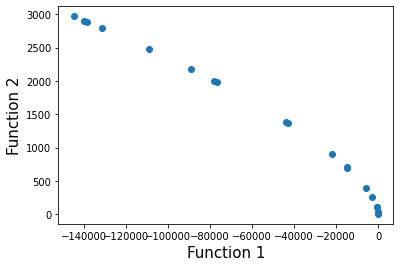

In [ ]:
function1 = [i * -1 for i in function1_values]     #With the for loop we can execute a set of statements, once for each item in a list, tuple, set.
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)      #The Matplotlib module has a method for drawing scatter plots, it needs two arrays of the same length.
plt.ylabel('Function 2', fontsize=15)      #One for the values of the x-axis, and one for the values of the y-axis.
plt.scatter(function1, function2)          #A scatter plot is a diagram where each value in the data set is represented by a dot.
plt.show()